This matrix describes the votes on bills in the 111th session of the United States Senate. (The data set was obtained from |voteview.com|.) Each row is one senator and each column is a vote item.

In [1]:
using JLD
vars = load("voting.jld")
A = vars["A"]
m,n = size(A)

┌ Info: Recompiling stale cache file /Users/driscoll/.julia/compiled/v1.0/JLD/l8ijy.ji for JLD [4138dd39-2aa7-5051-a626-17a0bb65d9c8]
└ @ Base loading.jl:1190


(112, 696)

If we visualize the votes (white is "yea," black is "nay," and gray is anything else), we can see great similarity between many rows, reflecting party unity.

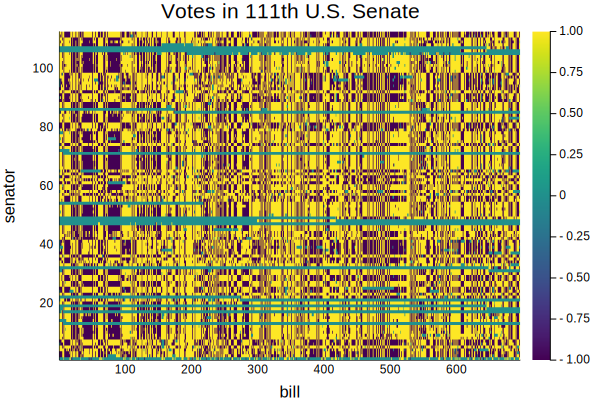

In [2]:
using Plots
heatmap(A,color=:viridis,
    title="Votes in 111th U.S. Senate",xlabel="bill",ylabel="senator")

We use singular value "energy" to quantify the decay rate of the values. 

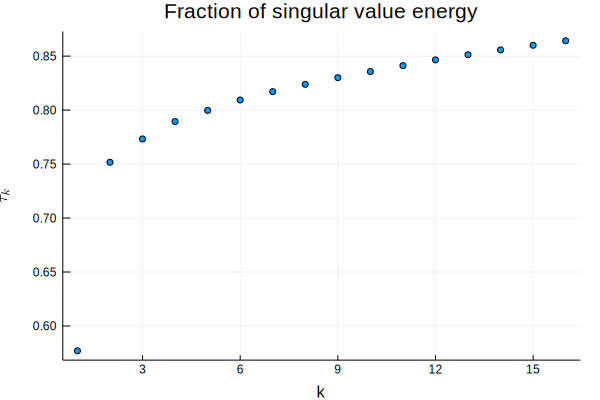

In [7]:
using LinearAlgebra
U,sigma,V = svd(A)
tau = cumsum(sigma.^2) / sum(sigma.^2)

scatter(tau[1:16],m=3,label="",
    xaxis=("k"), yaxis=("\$\\tau_k\$"), title="Fraction of singular value energy")

The first and second singular triples contain about 58% and 17% respectively of the energy of the matrix. All others have far less effect, suggesting that the information is primarily two-dimensional. The first left and right singular vectors also contain interesting structure.

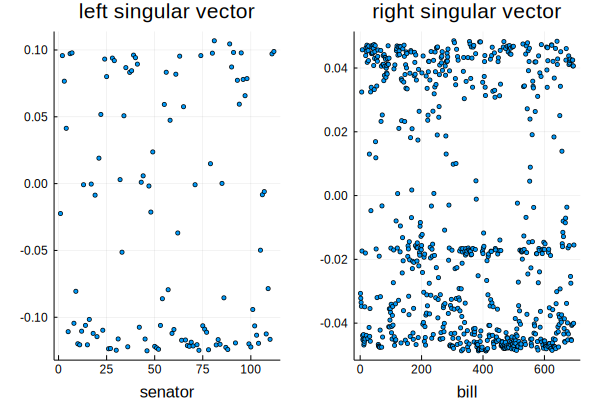

In [5]:
scatter( U[:,1], m=2,label="",layout=(1,2),
    xlabel="senator" ,title="left singular vector")
scatter!( V[:,1], m=2,label="",subplot=2,
    xlabel="bill",title="right singular vector")

Both vectors have values greatly clustered near $\pm C$  for a constant $C$. These can be roughly interpreted as how partisan a particular senator or bill was, and for which political party.   Projecting the senators' vectors into the first two $\V$-coordinates gives a particularly nice way to reduce them to two dimensions. Political scientists label these dimensions "partisanship" and "bipartisanship." Here we color them by actual party affiliation (also given in the data file): red for Republican, blue for Democrat, and yellow for independent. 

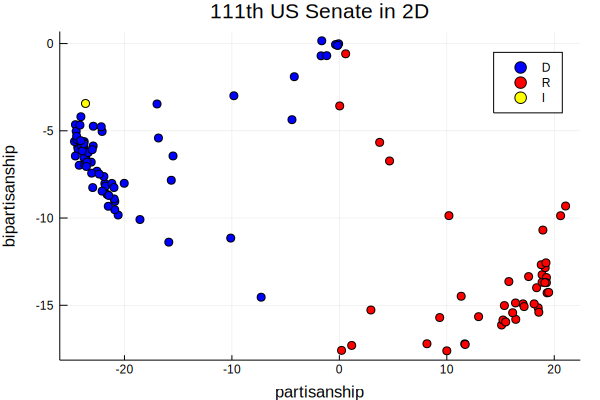

In [6]:
x1 = A*V[:,1];   x2 = A*V[:,2];

Rep = vec(vars["Rep"]); Dem = vec(vars["Dem"]);  Ind = vec(vars["Ind"]);
scatter(x1[Dem],x2[Dem],color=:blue,label="D",
    xaxis=("partisanship"),yaxis=("bipartisanship"),title="111th US Senate in 2D" )
scatter!(x1[Rep],x2[Rep],color=:red,label="R")
scatter!(x1[Ind],x2[Ind],color=:yellow,label="I")